In [2]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Telco_churn_original.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace=True)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
dtype(df['MonthlyCharges'])

dtype('float64')

In [12]:
df_num = [[df[col]] for col in df if dtype(df[col]) == int64 or dtype(df[col]) == float64]

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
df.InternetService.value_counts() # might need to replace 0 here for 'none' since this could interfere with dummies

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [15]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [16]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(7), object(1

**SOME EDA**

0    0.73463
1    0.26537
Name: Churn, dtype: float64


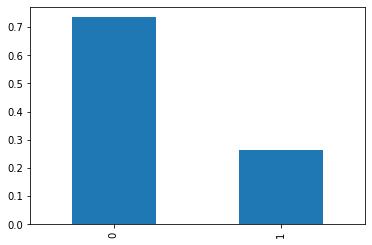

In [18]:
# finding balance of target classes

targets = df.Churn.value_counts(normalize = True)
print(targets)

targets.plot(kind='bar')

**BASELINING WITH JUST NUMERICAL VALUES FIRST**

In [19]:
#select only numerical val columns

df_nums = df.select_dtypes(include = ['float64', 'int64'])

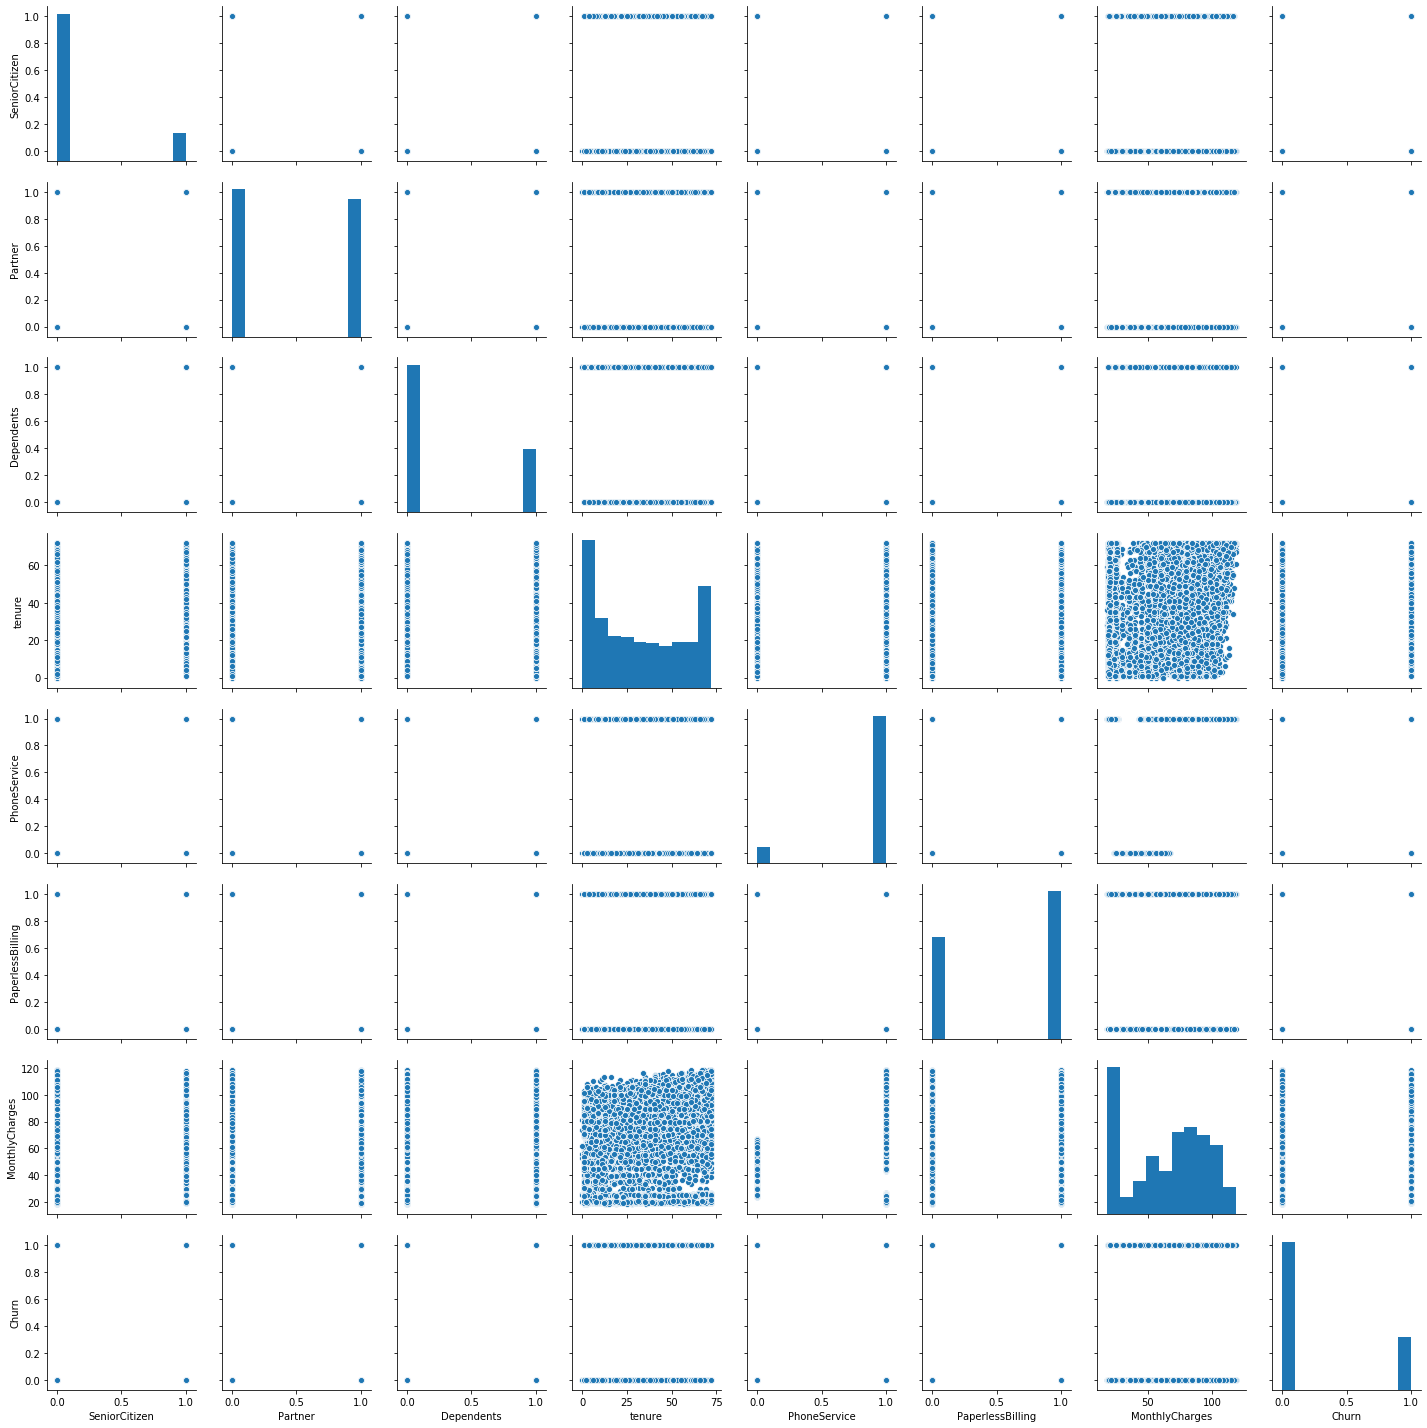

In [20]:
sns.pairplot(df_nums)

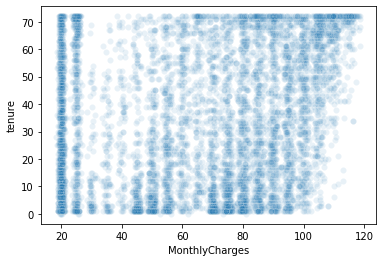

In [21]:
sns.scatterplot('MonthlyCharges', 'tenure', data=df_nums, alpha=0.1)

In [22]:
# SPLITTING DATA
X = df_nums.drop('Churn', axis=1)
y = df_nums.Churn

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [23]:
# initial baseline LOGISTIC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lrfit = lr.fit(X_train, y_train)
lrpred = lrfit.predict(X_test)
f1_score(y_test, lrpred)

0.5721271393643031

In [24]:
lr.coef_

array([[ 0.41841419,  0.00818588, -0.3438885 , -0.05319085, -0.83220156,
         0.49518576,  0.03063904]])

In [25]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges
0,0,1,0,1,0,1,29.85
1,0,0,0,34,1,0,56.95
2,0,0,0,2,1,1,53.85
3,0,0,0,45,0,0,42.30
4,0,0,0,2,1,1,70.70


**WHAT "TYPES" OF FEATURES DO WE HAVE?**

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
# 1) Human/User traits (gender, dependents, partner...)
# 2) Customer traits (tenure, charges, package options...)

# But, also, how do these traits compare with one another?

**Product level features** ?


(array([2371., 1126.,  989.,  947., 1610.]),
 array([ 0. , 14.4, 28.8, 43.2, 57.6, 72. ]),
 <a list of 5 Patch objects>)

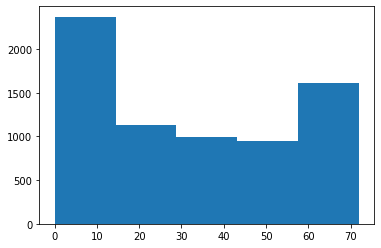

In [28]:
plt.hist(df.tenure, bins=5)

**Feat. Eng. 1 - Tenure into Bins**

In [29]:
tbins = pd.DataFrame(pd.cut(df.tenure, 5, labels = ['Tenure_shortest', 'Tenure_short', 'Tenure_medium', 'Tenure_long', 'Tenure_longest']))

In [30]:
tbins.columns = ['tenure_group']

In [31]:
tbins['customerID'] = df['customerID']

In [32]:
tbins.head()

,tenure_group,customerID
0,Tenure_shortest,7590-VHVEG
1,Tenure_medium,5575-GNVDE
2,Tenure_shortest,3668-QPYBK
3,Tenure_long,7795-CFOCW
4,Tenure_shortest,9237-HQITU


**Feat. Eng. 2 - Monthly Charges into Bins**

In [33]:
# CHARGES INTO BINS
monthly_bins = pd.DataFrame(pd.cut(df.MonthlyCharges, 5, labels = ['Lowest_Monthly', 'Low_Monthly', 'Mid_Monthly', 'High_Monthly', 'Highest_Monthly']))
monthly_bins

,MonthlyCharges
0,Lowest_Monthly
1,Low_Monthly
2,Low_Monthly
3,Low_Monthly
4,Mid_Monthly
...,...
7038,High_Monthly
7039,Highest_Monthly
7040,Lowest_Monthly
7041,Mid_Monthly


In [34]:
# Major issue with TotalCharges Columns. May want to make new one of estimate based on mo/charges

In [35]:
tbins['MonthlyCharges'] = df['MonthlyCharges']
tbins['Monthly_Bins'] = monthly_bins['MonthlyCharges']

In [36]:
tbins.head()

,tenure_group,customerID,MonthlyCharges,Monthly_Bins
0,Tenure_shortest,7590-VHVEG,29.85,Lowest_Monthly
1,Tenure_medium,5575-GNVDE,56.95,Low_Monthly
2,Tenure_shortest,3668-QPYBK,53.85,Low_Monthly
3,Tenure_long,7795-CFOCW,42.30,Low_Monthly
4,Tenure_shortest,9237-HQITU,70.70,Mid_Monthly


**Feat. Eng. 3 - Est Total Charges into Bins**

In [37]:
tbins['Est_Total_Charge'] = df['MonthlyCharges'] * df['tenure']

In [38]:
Est_Tot_Bins = pd.cut(tbins['Est_Total_Charge'], 5, labels=['Lowest_Total', 'Low_Total', 'Medium_Total', 'High_Total', 'Highest_Total'])

In [39]:
tbins['Est_Total_Bins'] = Est_Tot_Bins

In [40]:
# Average monthly Charges per tenure group

tbins.groupby('tenure_group').MonthlyCharges.mean()

tenure_group
Tenure_shortest    56.490953
Tenure_short       61.832060
Tenure_medium      66.680738
Tenure_long        68.828986
Tenure_longest     75.419472
Name: MonthlyCharges, dtype: float64

In [41]:
# Average total Charges per tenure group

tbins.groupby('Est_Total_Bins').Est_Total_Charge.mean()

Est_Total_Bins
Lowest_Total      605.805036
Low_Total        2479.150209
Medium_Total     4261.034803
High_Total       5935.795370
Highest_Total    7548.810705
Name: Est_Total_Charge, dtype: float64

In [42]:
# find std for each monthly charge from average per tenure group and avg of everything



In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Int_Service_YN
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


**Feat. Eng. 4 - Total # of Items per Customer**

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
df.replace(['No internet service', 'No phone service'], 0, inplace=True)

In [45]:
#This actually did work. Ignore error.

tbins['Int_Service_YN'] = df['InternetService']

for i in tbins['Int_Service_YN']:
    if i != 0:
        tbins.replace(i,1, inplace=True )
        

In [46]:
df['Int_Service_YN'] = tbins['Int_Service_YN']

In [50]:
df_num_add = df[['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Int_Service_YN']] 

In [51]:
for col in df_num_add.columns:
    pd.to_numeric(df_num_add[col])

In [52]:
df_num_add.dtypes

PhoneService        int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Int_Service_YN      int64
dtype: object

In [53]:
tbins['Total_Products'] = df_num_add.sum(axis=1)

In [54]:
tbins.drop('Total_Services', axis=1, inplace=True)

KeyError: "['Total_Services'] not found in axis"

In [55]:
tbins

,tenure_group,customerID,MonthlyCharges,Monthly_Bins,Est_Total_Charge,Est_Total_Bins,Int_Service_YN,Total_Products
0,Tenure_shortest,7590-VHVEG,29.85,Lowest_Monthly,29.85,Lowest_Total,1,2
1,Tenure_medium,5575-GNVDE,56.95,Low_Monthly,1936.30,Low_Total,1,4
2,Tenure_shortest,3668-QPYBK,53.85,Low_Monthly,107.70,Lowest_Total,1,4
3,Tenure_long,7795-CFOCW,42.30,Low_Monthly,1903.50,Low_Total,1,4
4,Tenure_shortest,9237-HQITU,70.70,Mid_Monthly,141.40,Lowest_Total,1,2
...,...,...,...,...,...,...,...,...
7038,Tenure_short,6840-RESVB,84.80,High_Monthly,2035.20,Low_Total,1,8
7039,Tenure_longest,2234-XADUH,103.20,Highest_Monthly,7430.40,Highest_Total,1,7
7040,Tenure_shortest,4801-JZAZL,29.60,Lowest_Monthly,325.60,Lowest_Total,1,2
7041,Tenure_shortest,8361-LTMKD,74.40,Mid_Monthly,297.60,Lowest_Total,1,3


**MERGE DFs**


In [56]:
df_merg = df.merge(tbins, on='customerID')

In [57]:
df_merg.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_x,TotalCharges,Churn,Int_Service_YN_x,tenure_group,MonthlyCharges_y,Monthly_Bins,Est_Total_Charge,Est_Total_Bins,Int_Service_YN_y,Total_Products
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,Tenure_shortest,29.85,Lowest_Monthly,29.85,Lowest_Total,1,2
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,1,Tenure_medium,56.95,Low_Monthly,1936.30,Low_Total,1,4
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,Tenure_shortest,53.85,Low_Monthly,107.70,Lowest_Total,1,4
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,Tenure_long,42.30,Low_Monthly,1903.50,Low_Total,1,4
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,Tenure_shortest,70.70,Mid_Monthly,141.40,Lowest_Total,1,2


In [58]:
df_merg.drop(['MonthlyCharges_y', 'Int_Service_YN_y'],axis=1, inplace=True)

In [59]:
df_merg.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges_x,TotalCharges,Churn,Int_Service_YN_x,tenure_group,Monthly_Bins,Est_Total_Charge,Est_Total_Bins,Total_Products
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,Tenure_shortest,Lowest_Monthly,29.85,Lowest_Total,2
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,1,Tenure_medium,Low_Monthly,1936.30,Low_Total,4
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,Tenure_shortest,Low_Monthly,107.70,Lowest_Total,4
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,Tenure_long,Low_Monthly,1903.50,Low_Total,4
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,Tenure_shortest,Mid_Monthly,141.40,Lowest_Total,2


In [60]:
df_merg.rename(columns={'MonthlyCharges_x': 'MonthlyCharges', 'Int_Service_YN_x':'Int_Service_YN'}, inplace=True)

In [61]:
df_merg.drop('TotalCharges', axis=1, inplace=True)

In [62]:
df_merg.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Int_Service_YN,tenure_group,Monthly_Bins,Est_Total_Charge,Est_Total_Bins,Total_Products
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,1,Tenure_shortest,Lowest_Monthly,29.85,Lowest_Total,2
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0,1,Tenure_medium,Low_Monthly,1936.30,Low_Total,4
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1,1,Tenure_shortest,Low_Monthly,107.70,Lowest_Total,4
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0,1,Tenure_long,Low_Monthly,1903.50,Low_Total,4
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,1,Tenure_shortest,Mid_Monthly,141.40,Lowest_Total,2


In [63]:
df_merg.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
Churn                 int64
Int_Service_YN        int64
tenure_group         object
Monthly_Bins         object
Est_Total_Charge    float64
Est_Total_Bins       object
Total_Products        int64
dtype: object

**DUMMIES FEAT**

In [64]:
df_merg.to_pickle('df_merge.pkl')

In [65]:
#apply get dummies for selected columns

dummy_columns = ['gender', 'InternetService', 'Contract',
                 'PaymentMethod', 'tenure_group', 'Monthly_Bins', 'Est_Total_Bins']

df_merg = pd.get_dummies(data = df_merg,columns = dummy_columns)

In [66]:
df_merg.drop('InternetService_0', axis=1, inplace=True)

In [67]:
df_merg.to_pickle('df_merge.pkl')

In [68]:
df_all = pd.read_pickle('df_merge.pkl')

In [69]:
#Lowercase all column names

df_all.columns = map(str.lower, df_all.columns)

In [70]:
df_all['tenure_group'] = tbins['tenure_group']

In [71]:
df_all['monthly_group'] = tbins['Monthly_Bins']
df_all['total_group'] = tbins['Est_Total_Bins']

In [72]:
df_all.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,4,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total


In [88]:
df_all.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.00000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,0.265370,0.783331,2279.581350,4.146244,0.495244,0.504756,0.343746,0.439585,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880,0.13446,0.228596,0.140423,0.159875,0.336646,0.259265,0.148800,0.142695,0.255147,0.194093,0.099673,0.054380,0.169530,0.554025,0.122391,-1.762832e-16,-1.085872e-15
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,0.441561,0.412004,2264.729447,2.312720,0.500013,0.500013,0.474991,0.496372,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141,0.34117,0.419958,0.347450,0.366516,0.472596,0.438262,0.355917,0.349786,0.435975,0.395529,0.299585,0.226783,0.375246,0.497108,0.327760,9.997159e-01,9.997159e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.978197e+00,-2.179824e+00
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000,1.000000,394.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.820624e-01,-7.046665e-01
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,0.000000,1.000000,1393.600000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-5.189134e-02,-9.971558e-02
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000,1.000000,3786.100000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000

In [73]:
df_all.to_pickle('df_all_recent1.pkl')

**NEW BASELINE**

In [74]:
X = df_all.drop(['customerid', 'churn', 'tenure_group', 'monthly_group', 'total_group'], axis=1)
y = df_all.churn

In [75]:
def baseline(X,y):
        
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=41)
    
    lr = LogisticRegression(max_iter = 5000)
    lr_fit = lr.fit(X_train, y_train)
    lr_pred = lr_fit.predict(X_test)
    
    return f1_score(y_test, lr_pred)

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Int_Service_YN
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [76]:
baseline(X,y)

0.5802752293577981

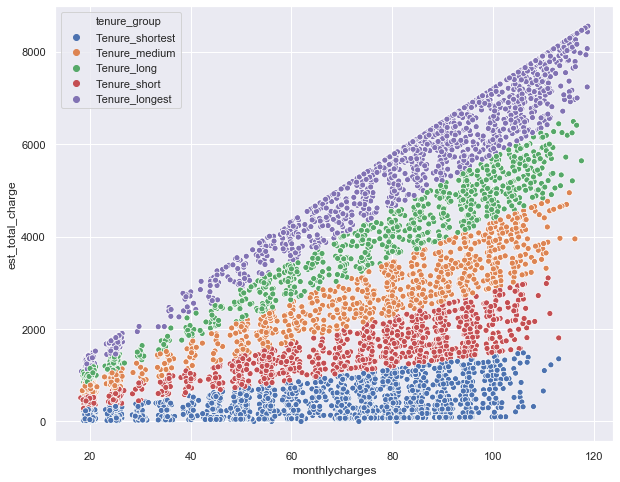

In [77]:
sns.set()
plt.figure(figsize=(10,8))
sns.scatterplot(df_all['monthlycharges'], df_all['est_total_charge'], hue=df_all['tenure_group'])

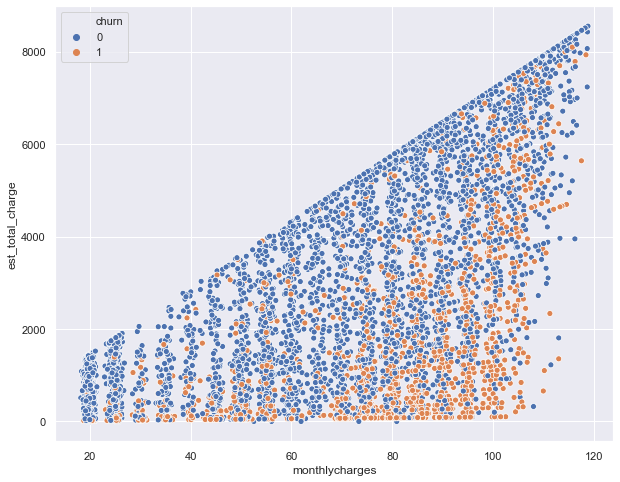

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(df_all['monthlycharges'], df_all['est_total_charge'], hue=df_all['churn'])

**ADDING DEVIATION FEATURES**

In [79]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

**TENURE GROUP DEVIATION FEATURE**

In [80]:
add_deviation_feature(df_all, 'tenure', 'tenure_group')

In [81]:
df_all.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group,tenure_Dev_tenure_group
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total,-1.050037
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total,-0.424251
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,4,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total,-0.811863
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total,-1.440796
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total,-0.811863


In [82]:
# tenure_Dev_tenure_group makes model considerably worse 0.580 -> 0.574

add_deviation_feature(df_all, 'tenure', 'tenure_group')

In [83]:
baseline(X,y)

0.5802752293577981

**ADD MONTHLY DEVIATION FEATURE**

In [84]:
add_deviation_feature(df_all, 'monthlycharges', 'monthly_group')

In [85]:
df_all.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total,-1.050037,1.725486
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total,-0.424251,1.457531
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,4,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total,-0.811863,0.846377
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total,-1.440796,-1.430667
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total,-0.811863,0.220984


In [86]:
# THIS ACTUALLY WORKED PRETTY WELL 0.574 -> 0.5925
baseline(X,y)

0.5802752293577981

**ADD TOTAL CHARGE DEVIATION FEATURE**

In [ ]:
# Makes it worse

In [ ]:
add_deviation_feature(df_all, 'est_total_charge', 'total_group')

In [ ]:
baseline(X,y)

In [ ]:
df_all.head()

**Monthly charges STD tenure group**

In [ ]:
add_deviation_feature(df_all, 'monthlycharges', 'tenure_group')

**total charges STD tenure group**

In [292]:
add_deviation_feature(df_all, 'est_total_charge', 'tenure_group')

**Tenure STD monthly group**

In [294]:
add_deviation_feature(df_all, 'tenure', 'monthly_group')

In [ ]:
add_deviation_feature(df_all, 'tenure', 'monthly_group')

**Tenure STD total group**

In [297]:
add_deviation_feature(df_all, 'tenure', 'total_group')

In [299]:
df_all.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group,est_total_charge_Dev_total_group,monthlycharges_Dev_tenure_group,est_total_charge_Dev_tenure_group,tenure_Dev_monthly_group,tenure_Dev_total_group
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total,-1.050037,1.725486,-1.145615,-0.999941,-0.909266,-1.149250,-0.865068
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total,-0.424251,1.457531,-1.069528,-0.328595,-0.407661,0.482893,-0.307999
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,4,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total,-0.811863,0.846377,-0.990766,-0.099126,-0.663209,-0.973666,-0.810024
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total,-1.440796,-1.430667,-1.134151,-0.859176,-0.993210,0.983585,0.448265
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total,-0.811863,0.220984,-0.923734,0.533322,-0.556696,-1.089959,-0.810024


In [300]:
df_all.to_pickle('df_all_recent2.pkl')

**are you buying popular products? How many? 'Count_Popular'. MIGHT MAKE A GOOD GRAPH!!!**

print("Phone service", sum(df_all['phoneservice']))
print('multiplelines', sum(df_all['multiplelines']))
print('onlinesecurity', sum(df_all['onlinesecurity']))
print('onlinebackup', sum(df_all['onlinebackup']))
print('deviceprotection', sum(df_all['deviceprotection']))
print('techsupport', sum(df_all['techsupport']))
print('streamingtv', sum(df_all['streamingtv']))
print('streamingmovies', sum(df_all['streamingmovies']))
print('paperlessbilling', sum(df_all['paperlessbilling']))
print('int_service_yn', sum(df_all['int_service_yn']))

In [316]:
df_all['count_popular'] = df_all['int_service_yn'] + df_all['phoneservice'] + df_all['paperlessbilling']

In [317]:
df_all['count_unpopular'] = df_all['onlinesecurity'] + df_all['techsupport'] + df_all['deviceprotection']

In [1]:
df_all.head()

NameError: name 'df_all' is not defined

In [320]:
nums = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Int_Service_YN','PaperlessBilling']


nums = [i.lower() for i in nums]

In [322]:
df_nums2 = df_all[nums]

**what percent of total products are popular, unpopular?**

In [325]:
df_nums2.head()

,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,int_service_yn,paperlessbilling
0,0,0,0,1,0,0,0,0,1,1
1,1,0,1,0,1,0,0,0,1,0
2,1,0,1,1,0,0,0,0,1,1
3,0,0,1,0,1,1,0,0,1,0
4,1,0,0,0,0,0,0,0,1,1


In [330]:
df_all['total_products'] = df_nums2.sum(axis=1)

In [328]:
df_all['%_popular'] = df_all['count_popular'] / df_nums2.sum(axis=1)

In [329]:
df_all['%_unpopular'] = df_all['count_unpopular'] / df_nums2.sum(axis=1)

In [331]:
df_all.head()

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,int_service_yn,est_total_charge,total_products,gender_female,gender_male,internetservice_dsl,internetservice_fiber optic,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer (automatic),paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tenure_group_tenure_long,tenure_group_tenure_longest,tenure_group_tenure_medium,tenure_group_tenure_short,tenure_group_tenure_shortest,monthly_bins_high_monthly,monthly_bins_highest_monthly,monthly_bins_low_monthly,monthly_bins_lowest_monthly,monthly_bins_mid_monthly,est_total_bins_high_total,est_total_bins_highest_total,est_total_bins_low_total,est_total_bins_lowest_total,est_total_bins_medium_total,tenure_group,monthly_group,total_group,tenure_Dev_tenure_group,monthlycharges_Dev_monthly_group,est_total_charge_Dev_total_group,monthlycharges_Dev_tenure_group,est_total_charge_Dev_tenure_group,tenure_Dev_monthly_group,tenure_Dev_total_group,count_popular,count_unpopular,%_popular,%_unpopular
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,0,1,29.85,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,Tenure_shortest,Lowest_Monthly,Lowest_Total,-1.050037,1.725486,-1.145615,-0.999941,-0.909266,-1.149250,-0.865068,2,0,0.666667,0.00
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,0,1,1936.30,4,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_medium,Low_Monthly,Low_Total,-0.424251,1.457531,-1.069528,-0.328595,-0.407661,0.482893,-0.307999,2,2,0.500000,0.50
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,1,1,107.70,5,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Tenure_shortest,Low_Monthly,Lowest_Total,-0.811863,0.846377,-0.990766,-0.099126,-0.663209,-0.973666,-0.810024,3,1,0.600000,0.20
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,0,1,1903.50,4,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Tenure_long,Low_Monthly,Low_Total,-1.440796,-1.430667,-1.134151,-0.859176,-0.993210,0.983585,0.448265,1,3,0.250000,0.75
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,1,1,141.40,3,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,Tenure_shortest,Mid_Monthly,Lowest_Total,-0.811863,0.220984,-0.923734,0.533322,-0.556696,-1.089959,-0.810024,3,0,1.000000,0.00


In [332]:
df_all.to_pickle('df_all_recent3.pkl')

In [333]:
#total product owned bin and std column

df_all['prod_own_group'] = pd.cut(df_all.total_products, 3 , labels = ['low_products', 'med_products', 'most_products'])

In [336]:
dummy_columns2 = ['prod_own_group']

df_all = pd.get_dummies(data = df_all,columns = dummy_columns2)

In [338]:
df_all['prod_own_group'] = pd.cut(df_all.total_products, 3 , labels = ['low_products', 'med_products', 'most_products'])

In [341]:
# monthly,total costs per product group std

add_deviation_feature(df_all, 'monthlycharges', 'prod_own_group')
add_deviation_feature(df_all, 'est_total_charge', 'prod_own_group')

In [1]:
df_all.head()

NameError: name 'df_all' is not defined

In [343]:
df_all.to_pickle('df_all_recent3.pkl')